In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_barcelona_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('barcelona')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/barcelona_{date}.csv',index=False)
get_listings_barcelona_timeseries()

In [3]:
# pull in detailed_listings
raw_df_barcelona = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_barcelona)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(barcelona_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 16055 AirBnb listings.


In [4]:
barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
barcelona_raw_df_12_12_2020.shape





(19641, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for barcelona
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_barcelona = glob.glob('barcelona/**.csv')
files_barcelona

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['barcelona/Barcelona_2020-12.csv',
 'barcelona/Barcelona_2021-08.csv',
 'barcelona/Barcelona_2021-09.csv',
 'barcelona/Barcelona_2021-01.csv',
 'barcelona/Barcelona_2021-02.csv',
 'barcelona/Barcelona_2021-03.csv',
 'barcelona/Barcelona_2021-07.csv',
 'barcelona/Barcelona_2021-06.csv',
 'barcelona/Barcelona_2021-04.csv',
 'barcelona/Barcelona_2021-10.csv',
 'barcelona/Barcelona_2021-05.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(barcelona_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(barcelona_raw_df_12_12_2020['price'].mean(),2)}.")

barcelona_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(barcelona_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_1_9_2021['price'].mean(),2)}.")

barcelona_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(barcelona_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_2_8_2021['price'].mean(),2)}.")

barcelona_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(barcelona_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_3_4_2021['price'].mean(),2)}.")

barcelona_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(barcelona_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_4_9_2021['price'].mean(),2)}.")

#barcelona_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(barcelona_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_5_19_2021['price'].mean(),2)}.")

barcelona_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(barcelona_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_6_3_2021['price'].mean(),2)}.")

barcelona_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(barcelona_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_7_4_2021['price'].mean(),2)}.")

barcelona_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(barcelona_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_8_6_2021['price'].mean(),2)}.")

barcelona_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(barcelona_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_9_7_2021['price'].mean(),2)}.")

barcelona_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(barcelona_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_10_6_2021['price'].mean(),2)}.")

#barcelona_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(barcelona_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 19641 AirBnb listings; the avg price is €91.91.
The 1_9_2021 dataset contains 18569 AirBnb listings; the avg price is €103.39.
The 2_8_2021 dataset contains 18471 AirBnb listings; the avg price is €103.76.
The 3_4_2021 dataset contains 18286 AirBnb listings; the avg price is €106.15.
The 4_9_2021 dataset contains 18226 AirBnb listings; the avg price is €110.39.
The 6_3_2021 dataset contains 17589 AirBnb listings; the avg price is €111.72.
The 7_4_2021 dataset contains 17079 AirBnb listings; the avg price is €115.01.
The 8_6_2021 dataset contains 16554 AirBnb listings; the avg price is €115.96.
The 9_7_2021 dataset contains 16206 AirBnb listings; the avg price is €109.26.
The 10_6_2021 dataset contains 16055 AirBnb listings; the avg price is €112.47.


In [7]:
df_list_barcelona = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021,
           barcelona_raw_df_3_4_2021, barcelona_raw_df_4_9_2021,  barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021,
           barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021, barcelona_raw_df_10_6_2021]

dates_barcelona = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_barcelona = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_barcelona = []

def airbnb_parse_barcelona(df_list, files):
    for file in files_barcelona:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_{file}.csv")
        print(f"The {file} barcelona dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_barcelona(df_list, dates):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_{file}.csv")
        #print(f"The {date} barcelona dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_barcelona.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_barcelona)

barcelona_parse = airbnb_parse_barcelona(df_list_barcelona, files_barcelona)


The 2020-12 barcelona dataset contains 19641 AirBnb listings -- the avg price is €91.91.
The 2021-01 barcelona dataset contains 18569 AirBnb listings -- the avg price is €103.39.
The 2021-02 barcelona dataset contains 18471 AirBnb listings -- the avg price is €103.76.
The 2021-03 barcelona dataset contains 18286 AirBnb listings -- the avg price is €106.15.
The 2021-04 barcelona dataset contains 18226 AirBnb listings -- the avg price is €110.39.
The 2021-06 barcelona dataset contains 17589 AirBnb listings -- the avg price is €111.72.
The 2021-07 barcelona dataset contains 17079 AirBnb listings -- the avg price is €115.01.
The 2021-08 barcelona dataset contains 16554 AirBnb listings -- the avg price is €115.96.
The 2021-09 barcelona dataset contains 16206 AirBnb listings -- the avg price is €109.26.
The 2021-10 barcelona dataset contains 16055 AirBnb listings -- the avg price is €112.47.


In [8]:
barcelona_summary = airbnb_to_frame_barcelona(df_list_barcelona, files_barcelona)
barcelona_summary['Date of scrape'] = pd.to_datetime(barcelona_summary['Date of scrape'])
barcelona_summary['City'] = 'barcelona'
barcelona_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,19641,91.91,55.0,0,11500,1.01,barcelona
1,2021-01-01,18569,103.39,53.0,0,11500,0.99,barcelona
2,2021-02-01,18471,103.76,54.0,0,11500,0.96,barcelona
3,2021-03-01,18286,106.15,55.0,0,11500,0.94,barcelona
4,2021-04-01,18226,110.39,55.0,0,11500,0.92,barcelona
5,2021-06-01,17589,111.72,60.0,0,10045,0.99,barcelona
6,2021-07-01,17079,115.01,69.0,0,9999,1.01,barcelona
7,2021-08-01,16554,115.96,70.0,0,9999,1.08,barcelona
8,2021-09-01,16206,109.26,70.0,0,9999,1.16,barcelona
9,2021-10-01,16055,112.47,70.0,0,9999,1.16,barcelona


In [9]:
barcelona_summary_listings = barcelona_summary[['Date of scrape','# of Listings']]
barcelona_summary_listings.set_index('Date of scrape', inplace=True)


barcelona_summary_prices_avg = barcelona_summary[['Date of scrape', 'Avg Price']]
barcelona_summary_prices_avg.set_index('Date of scrape', inplace=True)

barcelona_summary_prices_median = barcelona_summary[['Date of scrape', 'Median Price']]
barcelona_summary_prices_median.set_index('Date of scrape', inplace=True)

barcelona_summary_reviews_permonth = barcelona_summary[['Date of scrape', 'Avg reviews per month']]
barcelona_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

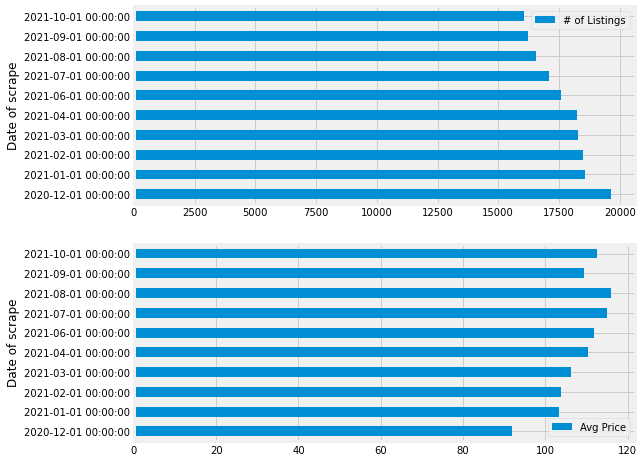

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

barcelona_summary_listings.plot(ax=ax1, kind='barh')
barcelona_summary_prices_avg.plot(ax=ax2, kind='barh')

In [11]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

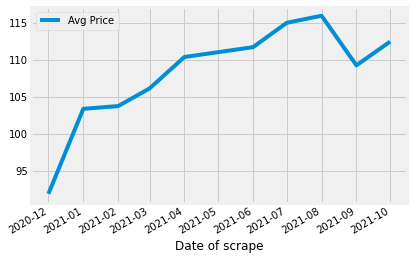

In [12]:
barcelona_summary.plot(x='Date of scrape', y='Avg Price')

In [13]:
master_df_barcelona = pd.concat(df_list_barcelona)
master_df_barcelona = master_df_barcelona[master_df_barcelona['room_type']=='Entire home/apt']
master_df_barcelona_unique = master_df_barcelona.drop_duplicates(subset='id')
#master_df_barcelona_unique = master_df_barcelona[master_df_barcelona_unique['room_type']=='Entire home/apt']
master_df_barcelona_unique['room_type'].value_counts()

Entire home/apt    12414
Name: room_type, dtype: int64

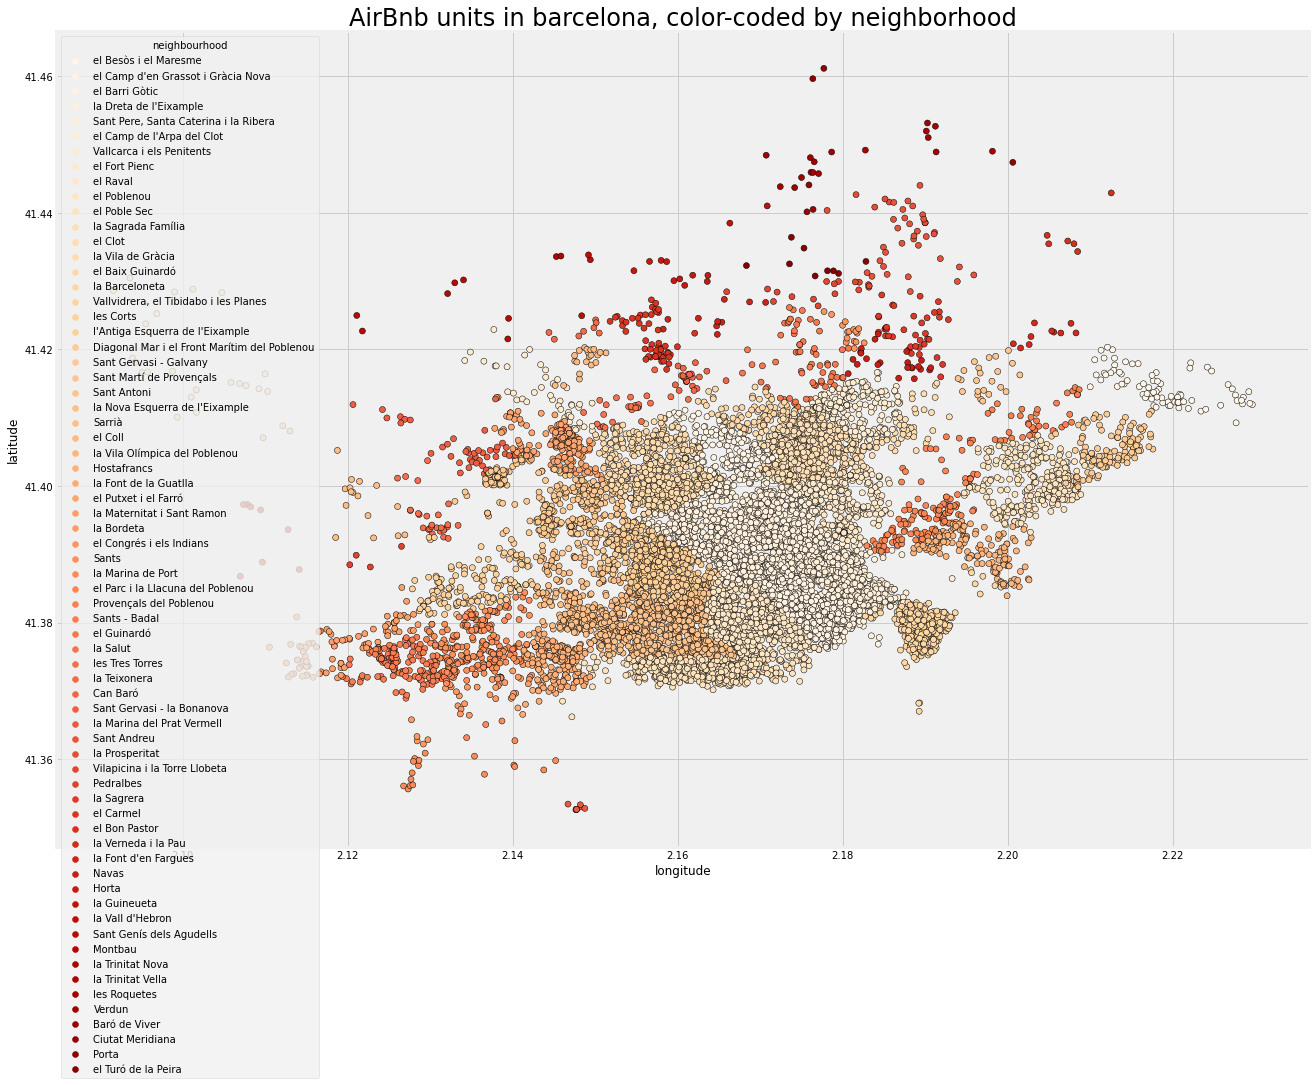

In [14]:
title = 'AirBnb units in barcelona, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_barcelona_unique.longitude, master_df_barcelona_unique.latitude, hue = master_df_barcelona_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_barcelona.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([barcelona_raw_df_10_6_2021,raw_df_barcelona],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(8695, 75)

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -93.90962617736795
Coefficients:  [24.74257296  1.18871005  0.18506382  0.05413946  5.35880681  7.66893527
 24.5414683  -4.87584614 -6.71278441]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(7395, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

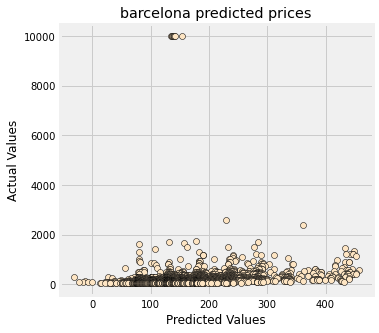

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('barcelona predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([  712,   752,  9960,  9834,  8023,  1245,  2403,  1779,  3404,
             5528,
            ...
             2133,  2764,   585,   641,   639, 15195,   662,  1755,  1756,
             1780],
           dtype='int64', length=7395)

In [23]:
raw_df_barcelona.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20211010233704,2021-10-11,Huge flat for 8 people close to Sagrada Familia,"110m2 apartment to rent in Barcelona. Located in the Eixample district, near the Sagrada Familia. It has a small balcony where you can see the temple of Gaudi. Capacity for 8 people. <br /><br />Licence number: HUTB-002062<br /><br /><b>The space</b><br />Apartment with 110 m2 located in the 6th floor in a building with elevator<br /><br />Huge living/dinig-room <br />1 double bedrrom <br />1 bedroom with 2 single beds <br />1 bedroom with bunk beds <br />Kitchen fully equipped for 8 people <br />1 bathroom with bathtub <br />1 small bathroom with shower <br />balcony <br /><br />The accommodation has been recently renovated and tastefully decorated with a comfortable furniture and wood floor. Also it is equipped with heating, air conditioning and wifi.<br /><br /><b>Guest access</b><br />Free Wifi - air conditioning.<br /><br />We will provide basic amenities like shower gel, shampoo,and hand soap. Also, 1 set of bed linen and towels per person will be included.<br /><br /><b>License","Apartment in Barcelona located in the heart of Eixample district, within only 150 m form the great Sagrada Familia and really near of Gaudí Avenue and the famous Sant Pau Hospital . <br />All kind of services in surroundings (shops, supermarkets, restaurants, bars).",https://a0.muscache.com/pictures/13031453/413cdbfc_original.jpg,71615,https://www.airbnb.com/users/show/71615,...,4.90,4.75,4.30,HUTB-002062,t,19,19,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20211010233704,2021-10-11,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5 minutes walk from the CCIB center, sea, Port Forum.<br />Excellent location to combine business with pleasure, ideal for families<br />Relax on the large terrace for a quiet dinner or a nice glass of cold beer or wine away from the hustle and bustle of Barcelona and the tourist crowds.<br />Groups of young people under 25 are not accepted, the apartment is not suitable for you.<br /><br /><b>The space</b><br />The stylish spacious apartment is suitable for 6.<br />Spacious living/dining room with air conditioning, floor to ceiling sliding glass doors opening onto a large balcony with dining table and chairs and wicker sofa.<br />Master bedroom with bathroom en suite. ceiling fan,<br />The office bedroom has bunk beds and a pedestal fan,<br />The third bedroom, two single beds, and a fan.<br />Guest bathroom: walk-in shower, sink, bidet, WC.<br />Fully equipped kitchen with access to the balcony; Fridge, freezer, halogen cooker, oven, micro","Strategically located in the Parc del Fòrum area, a spacious area where all kinds of music festivals and events are held throughout the year, so you need a car or a taxi, you can walk there in a few minutes!<br />It is an area reclaimed by the sea where you can find: the Esplanade, where fairs, music festivals or major events are held; the Fòrum building, triangular in shape and the undisputed icon of Barcelona's new architecture; the CCIB-Barcelona International Convention Center; the Parc dels Auditoris, a large outdoor space facing the sea; the spectacular photovoltaic plate, inclined and suspended on very peculiar columns, the Fòrum Marina with megayachts and the Forum safe swimming area with wheelchair access, where you can savor the genuine and Mediterranean character of the city. Excellent area also for walking, cycling, running .....<br />A few minutes walk from Diagonal Mar shopping center, frequent transport takes you 

In [24]:
df_result['id'] = df_result.index.values
df_result.shape

(7395, 4)

In [25]:
raw_df_barcelona.index.values
df_result.index.values

array([ 712,  752, 9960, ..., 1755, 1756, 1780])

In [26]:
df_result_merge = df_result.merge(raw_df_barcelona, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(16055, 77)

In [27]:
df_join = df_result.join(raw_df_barcelona, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1643
Length: 78, dtype: int64

In [28]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [29]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_barcelona = df_print[df_print['Predicted']>0]
df_print_barcelona.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
712,712,9999,"$9,999.00",135.399250,-9863.600750,https://www.airbnb.com/rooms/1338956,41.38251,2.13329,4,les Corts,4.90,4.89,4.96,4.93,4.93,4.89,4.96,31
752,752,9999,"$9,999.00",135.823558,-9863.176442,https://www.airbnb.com/rooms/1424841,41.38339,2.13521,4,les Corts,4.75,4.85,4.90,4.85,4.90,4.70,4.65,20
9960,9960,9999,"$9,999.00",136.955518,-9862.044482,https://www.airbnb.com/rooms/36515152,41.38311,2.13500,4,les Corts,5.00,5.00,5.00,5.00,4.00,5.00,5.00,1
9834,9834,9999,"$9,999.00",138.329292,-9860.670708,https://www.airbnb.com/rooms/36125691,41.38469,2.13364,4,les Corts,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1
8023,8023,9999,"$9,999.00",139.592308,-9859.407692,https://www.airbnb.com/rooms/29558824,41.40549,2.19012,6,el Parc i la Llacuna del Poblenou,3.38,3.88,3.13,4.00,4.38,4.50,3.25,9


In [30]:
df_print_barcelona['neighbourhood_cleansed'].value_counts()

la Dreta de l'Eixample             1211
la Sagrada Família                  599
la Vila de Gràcia                   490
l'Antiga Esquerra de l'Eixample     483
Sant Antoni                         410
                                   ... 
la Trinitat Vella                     1
Montbau                               1
el Bon Pastor                         1
Verdun                                1
Ciutat Meridiana                      1
Name: neighbourhood_cleansed, Length: 65, dtype: int64

In [31]:
df_print_barcelona_final = df_print_barcelona.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_barcelona_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [32]:
df_barcelona_query = df_print_barcelona_final.query('number_of_reviews >11 & accommodates <=6')
df_barcelona_query.shape
#df_barcelona_query.head()

(2831, 18)

In [33]:
df_barcelona_query_filter = df_barcelona_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_barcelona_query_filter.shape


(948, 18)

In [34]:
df_barcelona_query_filter.shape

(948, 18)

In [35]:
df_neighborhood_plot = df_print_barcelona_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
59,les Corts,900.755556
44,la Font d'en Fargues,561.400000
6,Pedralbes,368.666667
47,la Marina del Prat Vermell,326.666667
35,el Parc i la Llacuna del Poblenou,292.870968
1,Diagonal Mar i el Front Marítim del Poblenou,247.035714
57,la Vila Olímpica del Poblenou,210.942529
43,la Dreta de l'Eixample,195.324378
20,"Vallvidrera, el Tibidabo i les Planes",185.555556
13,Sant Gervasi - la Bonanova,178.666667


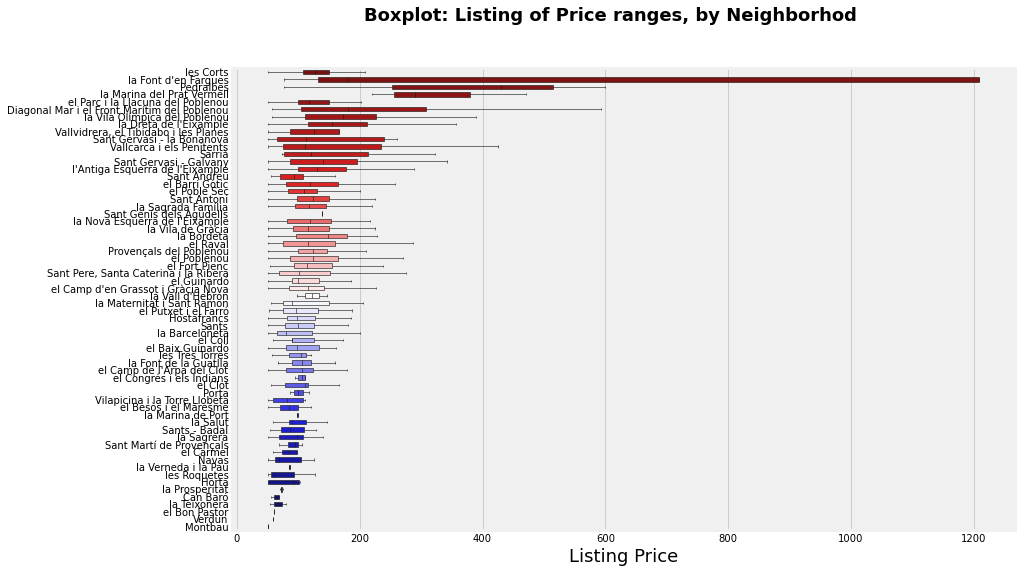

In [64]:
df_neighborhood_plot = df_print_barcelona_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_barcelona_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

fig.savefig('barcelona_neighborhood_boxplot.png')

In [37]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [38]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_barcelona)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 16055 files in the dataset
There is 4610 to be regressed with accommodates <=4


In [39]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -43.317009730811066
Coefficients:  [ 35.44586546 -33.56165171   6.83995453   0.06904336   0.61939649
  -3.89288676  31.83768033 -30.50872029  21.55141722]
LinearRegression()


In [40]:
y_pred2_4 = regr4.predict(X_4)

In [41]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(3810, 3)

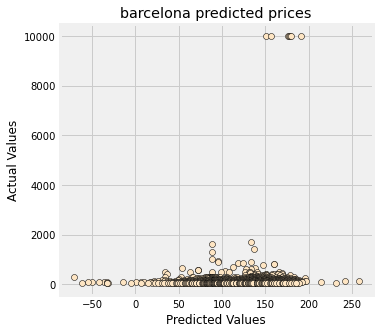

In [42]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('barcelona predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [43]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_barcelona)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 16055 files in the dataset
There is 1183 to be regressed with accommodates <=2


In [44]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -60.5445173124929
Coefficients:  [ 21.55129735  22.89518806   6.83379596   0.78486621   1.1886087
 -11.02691297   8.50322516   3.64156912   7.93995488]
LinearRegression()


In [45]:
y_pred2_2 = regr2.predict(X_2)

In [46]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(794, 3)

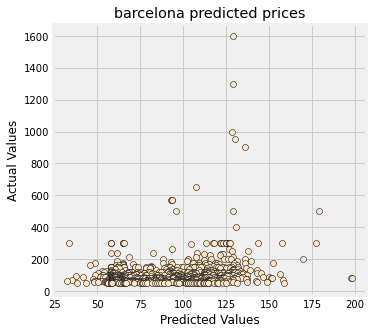

In [47]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('barcelona predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [48]:
## Regression fucntion, rooms for 2 or less

In [49]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_barcelona)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 16055 files in the dataset
There is 7206 to be regressed with accommodates <=6


In [50]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -40.577483053458735
Coefficients:  [ 26.09792683 -17.33967566  -0.71390548   0.07726698   2.09961283
   5.80430653  18.86635604  -9.24897473   4.11674354]
LinearRegression()


In [51]:
y_pred6_6 = regr6.predict(X_6)

In [52]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(6315, 3)

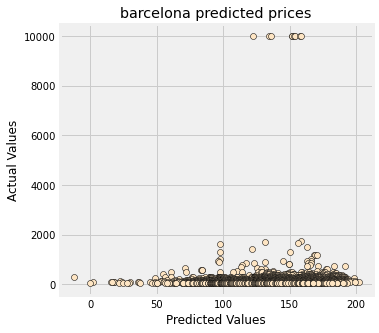

In [53]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('barcelona predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [54]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_barcelona)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 16055 files in the dataset
There is 8301 to be regressed


In [55]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -93.90962617736795
Coefficients:  [24.74257296  1.18871005  0.18506382  0.05413946  5.35880681  7.66893527
 24.5414683  -4.87584614 -6.71278441]
LinearRegression()


In [56]:
y_predall_all = regrall.predict(X_all)

In [57]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(7395, 3)

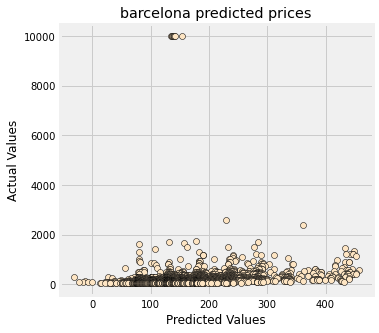

In [58]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('barcelona predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [59]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
0,18674,Entire rental unit,Entire home/apt,8,3.0,6.0,121,47,4.40,4.55,4.75,4.75,4.30
1,23197,Entire rental unit,Entire home/apt,6,3.0,5.0,220,63,4.74,4.92,4.92,4.67,4.69
2,32711,Entire rental unit,Entire home/apt,6,2.0,3.0,144,0,4.31,4.27,4.38,4.81,4.40
3,34981,Entire rental unit,Entire home/apt,9,4.0,6.0,181,46,4.52,4.66,4.62,4.73,4.48
9,40983,Entire loft,Entire home/apt,4,1.0,1.0,43,53,4.34,4.42,4.37,4.86,4.33


In [60]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -93.90962617736795
Coefficients:  [24.74257296  1.18871005  0.18506382  0.05413946  5.35880681  7.66893527
 24.5414683  -4.87584614 -6.71278441]
Intercept:  -60.5445173124929
Coefficients:  [ 21.55129735  22.89518806   6.83379596   0.78486621   1.1886087
 -11.02691297   8.50322516   3.64156912   7.93995488]
Intercept:  -43.317009730811066
Coefficients:  [ 35.44586546 -33.56165171   6.83995453   0.06904336   0.61939649
  -3.89288676  31.83768033 -30.50872029  21.55141722]
Intercept:  -40.577483053458735
Coefficients:  [ 26.09792683 -17.33967566  -0.71390548   0.07726698   2.09961283
   5.80430653  18.86635604  -9.24897473   4.11674354]


In [61]:
df_barcelona_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
3997,3997,93,$93.00,145.921155,52.921155,https://www.airbnb.com/rooms/14990926,41.40339,2.21449,4,Diagonal Mar i el Front Marítim del Poblenou,5.00,5.00,5.00,4.93,4.93,4.79,4.86,14
1140,1140,89,$89.00,143.615702,54.615702,https://www.airbnb.com/rooms/2473377,41.40216,2.16281,4,la Vila de Gràcia,4.95,4.94,4.99,4.98,4.99,4.83,4.86,185
630,630,100,$100.00,143.522510,43.522510,https://www.airbnb.com/rooms/1206052,41.40927,2.17599,4,la Sagrada Família,4.89,4.92,5.00,5.00,5.00,4.87,4.85,55
4215,4215,197,$197.00,143.141904,-53.858096,https://www.airbnb.com/rooms/16292600,41.38520,2.16431,4,el Raval,4.98,4.97,5.00,4.99,4.98,4.97,4.84,105
4314,4314,117,$117.00,143.031631,26.031631,https://www.airbnb.com/rooms/16668153,41.37411,2.16767,4,el Poble Sec,5.00,5.00,5.00,4.96,5.00,4.96,4.88,25


## Find the highest predicted in barcelona - <= 4

In [67]:
df_barcelona_query_filter['% Diff'] = (df_barcelona_query_filter['Price']/df_barcelona_query_filter['Predicted']-1)* 100
df_barcelona_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_barcelona_query_final = df_barcelona_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_barcelona_query_final)} listings that meet criteria')
df_barcelona_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head(6)


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 948 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
3997,93,145.92,-36.27,5.00,5.00,5.00,4.79,4.86,Diagonal Mar i el Front Marítim del Poblenou,https://www.airbnb.com/rooms/14990926,4,14
1140,89,143.62,-38.03,4.95,4.94,4.99,4.83,4.86,la Vila de Gràcia,https://www.airbnb.com/rooms/2473377,4,185
630,100,143.52,-30.32,4.89,4.92,5.00,4.87,4.85,la Sagrada Família,https://www.airbnb.com/rooms/1206052,4,55
4215,197,143.14,37.63,4.98,4.97,5.00,4.97,4.84,el Raval,https://www.airbnb.com/rooms/16292600,4,105
4314,117,143.03,-18.20,5.00,5.00,5.00,4.96,4.88,el Poble Sec,https://www.airbnb.com/rooms/16668153,4,25
9190,259,142.78,81.40,5.00,5.00,4.95,5.00,4.80,la Vila de Gràcia,https://www.airbnb.com/rooms/34134281,4,20


## Find the best deal in barcelona - <=4

In [63]:
df_barcelona_deal = df_barcelona_query_final[df_barcelona_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_barcelona_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
3256,50,135.10,-62.99,4.92,4.96,4.92,4.81,4.96,la Nova Esquerra de l'Eixample,https://www.airbnb.com/rooms/11938945,4,26
4383,50,131.88,-62.09,4.67,5.00,4.67,5.00,4.58,"Sant Pere, Santa Caterina i la Ribera",https://www.airbnb.com/rooms/16968205,4,12
214,55,138.23,-60.21,4.85,4.78,4.81,4.52,4.63,la Bordeta,https://www.airbnb.com/rooms/567962,4,27
8372,55,132.37,-58.45,4.82,4.96,4.80,4.86,4.80,el Camp d'en Grassot i Gràcia Nova,https://www.airbnb.com/rooms/31257984,4,49
11949,57,131.73,-56.73,4.78,4.73,4.75,4.65,4.80,el Raval,https://www.airbnb.com/rooms/42074375,4,40
2770,60,135.37,-55.68,4.74,4.71,4.91,4.85,4.59,Sant Gervasi - Galvany,https://www.airbnb.com/rooms/9293584,4,34
3879,59,131.78,-55.23,4.61,4.70,4.77,4.96,4.63,"Sant Pere, Santa Caterina i la Ribera",https://www.airbnb.com/rooms/14365279,4,60
